In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Hypthesis Function
def hyp(x,b=0,w=0):
    #This function calculates (returns) the hypothesis (predicted value) y=b+wx
    # x : is the features  #b : is the bias (intercept) #w : is the weight (slope)
    return b+(w*x)

In [4]:
#Cost Function
def cost(b,w,X,y):
    #This function calculates (returns) the loss (error) for the given data
    # X : is the features (many)  #b : is the bias (intercept) #w : is the weight (slope) #y : actual target values
    m=len(X)
    diff=(np.subtract(hyp(X,b,w),np.asarray(y))) #(b+(w*x))-y)
    diff_squared=np.square(diff) #(b+(w*x))-y)^2
    return (diff_squared.sum()/(m*2)) #(1/2m) *sumission((b+(w*x))-y)^2)

In [5]:
#Gradient Descent Function
def grad(b,w,a,X,y):
    #This function calculates (returns) the gradient descent
    # X : is the features (many)  #b : is the bias (intercept) #w : is the weight (slope) #y : actual target values #a : learning rate
    m=len(X)
    array_0=(np.subtract(hyp(X,b,w),np.asarray(y))) #Loss Function for bias
    array_1=np.matmul(np.transpose(array_0),X) #Loss * X for weight #We use transposing for multiplying matrices
    b_temp=(a/m)*array_0.sum()
    w_temp=(a/m)*array_1.sum()
    b_new=b-b_temp
    w_new=w-w_temp
    return(b_new,w_new)

In [6]:
#Loading the data into my datafram variable and showing it
df=pd.read_csv('profits.csv')
df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
995,71.0,68.545888
996,46.0,47.334876
997,55.0,54.090637
998,62.0,63.297171


In [7]:
#Describing my datafram to see its values status for x and y #Notice : y has 999 values from 1000 rows so it has a missing value (NAN)
df.describe()

,x,y
count,1000.000000,999.000000
mean,53.771157,50.319804
std,113.747929,29.089111
min,0.000000,-3.839981
25%,25.000000,25.185430
50%,50.000000,49.926397
75%,75.000000,74.475252
max,3530.157369,108.871618


In [8]:
#dropping the missing values (NAN) rows and keeping all other rows in place
df.dropna(inplace=True)
df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
995,71.0,68.545888
996,46.0,47.334876
997,55.0,54.090637
998,62.0,63.297171


In [9]:
#Splitting the data into training sets and testing sets for model
ratio=0.7
rows=df.shape[0]
train_size=int(rows*ratio)

train_data=df[0:train_size]
test_data=df[train_size:]

In [10]:
#Making my train data and test data into x,y
X_Train=pd.DataFrame(data=train_data['x'])
y_train=pd.DataFrame(data=train_data['y'])

XTest=pd.DataFrame(data=test_data['x'])
y_test=pd.DataFrame(data=test_data['y'])
print(X_Train.head())

      x
0  24.0
1  50.0
2  15.0
3  38.0
4  87.0


In [11]:
#Converting dataframes to array
X=X_Train.to_numpy()
X_Test=XTest.to_numpy()

Initial Cost : 1670.0624130893364
cost : 743.1010875141254

Iteration : 1
Differrence : 926.9613255752109
Bias : 0.004993986917045781
Weight : 0.33354245845185376
cost : 331.86123601466835

Iteration : 2
Differrence : 411.2398514994571
Bias : 0.008319284972241516
Weight : 0.5557035214498387
cost : 149.41757755535286

Iteration : 3
Differrence : 182.4436584593155
Bias : 0.010533127355656115
Weight : 0.7036773052035966
cost : 68.47773575109734

Iteration : 4
Differrence : 80.93984180425552
Bias : 0.012006667742524593
Weight : 0.8022375187713469
cost : 32.569345994371076

Iteration : 5
Differrence : 35.908389756726265
Bias : 0.012987118705779484
Weight : 0.8678850693676075
cost : 16.63884219635945

Iteration : 6
Differrence : 15.930503798011625
Bias : 0.01363913995457535
Weight : 0.9116106382126296
cost : 9.571386539860526

Iteration : 7
Differrence : 7.067455656498925
Bias : 0.01407240560255936
Weight : 0.9407347363616418
cost : 6.435959653629739

Iteration : 8
Differrence : 3.1354268862

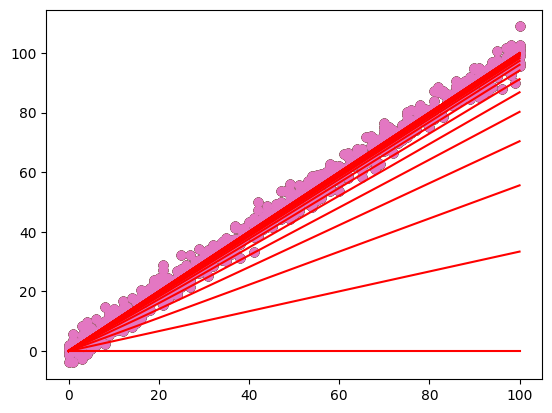

In [12]:
#Model Training
#Intializing values
alpha=0.0001
bias=0
weight=0
cost_hist=[]
num_iter=[]
#Converge threshold
my_diff=0.000001
#Initial Cost value
diff=cost(bias,weight,X,y_train) #difference between last and currrent cost value
print("Initial Cost : {}".format(cost(bias,weight,X,y_train)))
#Counting number of iterations
my_iter=0

while diff>=my_diff:
    #Drawing current hypothesis and training
    #Setting the x-y plane
    #Drawing all iterations to see how the hypothesis change
    my_line=np.linspace(0,100)
    z=bias+weight*(my_line)
    plt.scatter(X,y_train)
    plt.plot(my_line,z,'r')
    #Calculating initial cost
    initial_cost=cost(bias,weight,X,y_train)
    #Calculate and assign new bias and weight values
    bias,weight=grad(bias,weight,alpha,X,y_train)
    #Calculate the consecutive value
    cost_new=cost(bias,weight,X,y_train)
    print("cost : {}".format(cost_new))
    #Update the difference between the consecutive costs
    diff=initial_cost-cost_new
    #Update the iteration counter
    my_iter +=1
    cost_hist.append(cost_new)
    num_iter.append(my_iter)
    print()
    print("Iteration : {}".format(my_iter))
    print("Differrence : {}".format(diff))
    print("Bias : {}".format(bias))
    print("Weight : {}".format(weight))
    
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

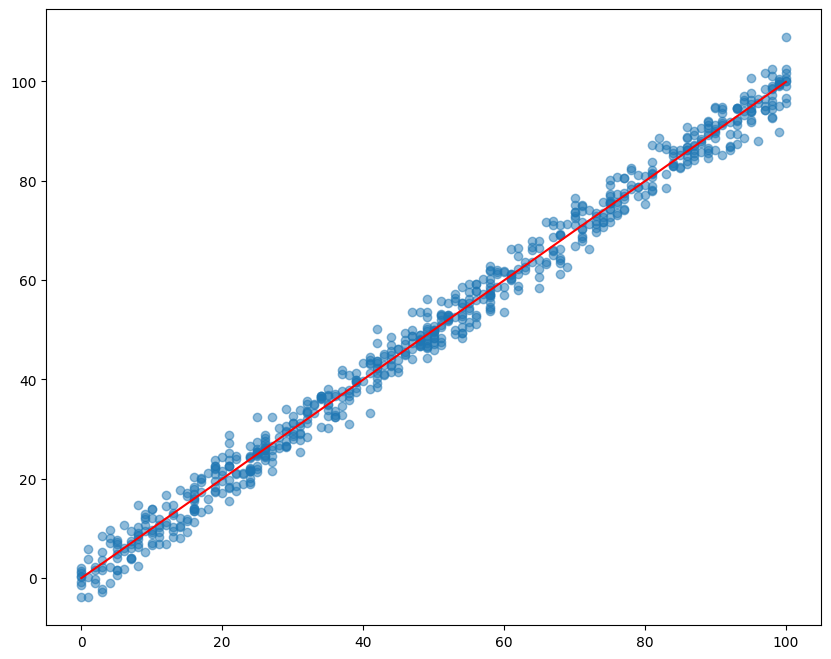

In [13]:
#Drawing final hypothesis and the training
#Setting x-y plane
my_line=np.linspace(0,100)
z=bias+weight*(my_line)
plt.figure(figsize=(10,8))
plt.scatter(X,y_train,alpha=0.5)
plt.plot(my_line,z,'r')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

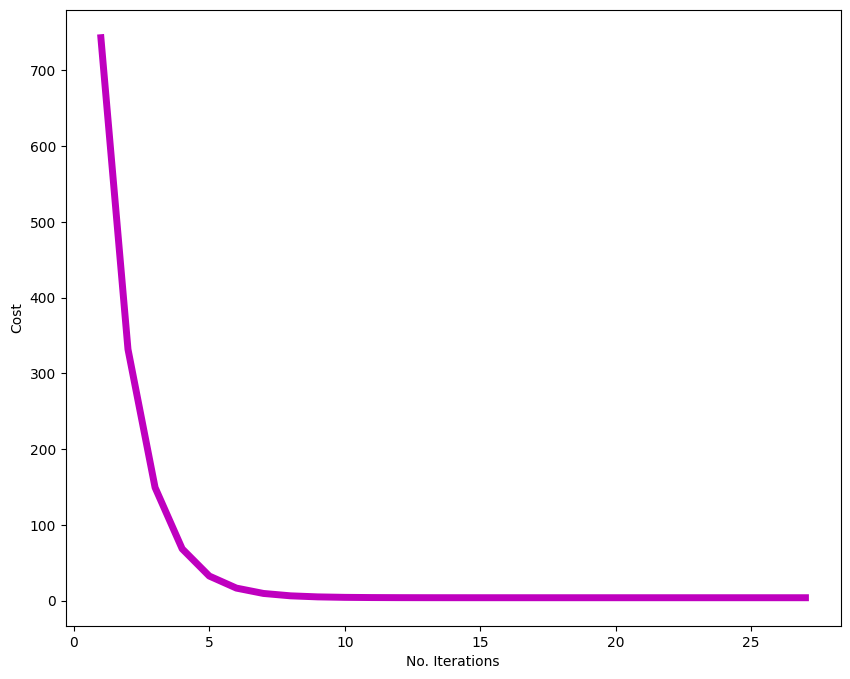

In [14]:
#Plotting the cost and iteration
plt.figure(figsize=(10,8))
plt.plot(num_iter,cost_hist,'m',linewidth="5")
plt.xlabel("No. Iterations")
plt.ylabel("Cost")
plt.show

Test Cost : 4.729094445431903


<function matplotlib.pyplot.show(close=None, block=None)>

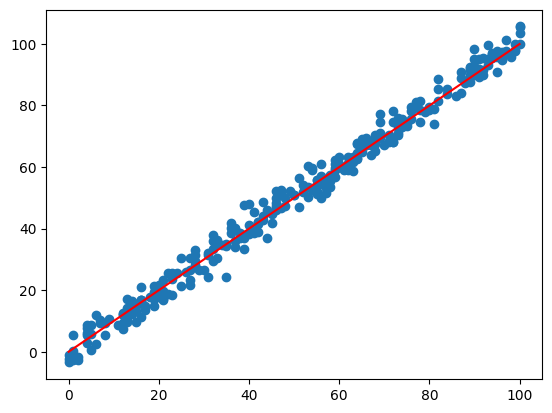

In [15]:
#Calculating cost value for test set
cos_test=cost(bias,weight,X_Test,y_test)
print("Test Cost : {}".format(cos_test))
#Plotting
my_line=np.linspace(0,100)
z=bias+weight*(my_line)
plt.scatter(X_Test,y_test)
plt.plot(my_line,z,'r')
plt.show